# DIAGNOSA PENYAKIT TANAMAN KELAPA SAWIT MENGGUNAKAN TEOREMA BAYES

## Anggota Kelompok:
#### - I Gede Restu Astikadeni (F1D021045)
#### - I Nyoman Bagus Arya W. (F1D021047) 
#### - Adam Asyari (F1D021072)

## Deskripsi kegiatan penelitian

##### Diagnosis penyakit pada tanaman kelapa sawit merupakan salah satu tantangan yang sering dihadapi oleh para petani atau peneliti. Sebagai tanaman yang sangat penting dalam produksi minyak kelapa sawit, keberadaan penyakit dapat menyebabkan kerugian yang signifikan dalam produksi dan hasil panen.
##### Dalam prakteknya, para ahli biasanya akan mengumpulkan data tentang berbagai gejala atau tanda-tanda penyakit pada kelapa sawit dan menggunakan data tersebut untuk mengembangkan model statistik yang dapat digunakan untuk memprediksi keberadaan penyakit. Dengan model ini, para ahli dapat memperkirakan probabilitas keberadaan penyakit pada kelapa sawit berdasarkan gejala atau tanda-tanda yang muncul pada tanaman.
##### Dengan menggunakan sistem pakar diagnosa penyakit tanaman kelapa sawit yang mengadopsi teorema Bayes, para petani atau ahli pertanian dapat dengan mudah dan cepat mendiagnosis penyakit pada tanaman kelapa sawit dan memberikan solusi yang tepat dan efektif untuk mengatasi masalah yang terjadi.




## Tujuan penelitian 

##### Tujuan dari penelitian ini yaitu untuk mendiagnosa probabilitas penyakit yang dialami oleh tanaman kelapa sawit.

## Hipotesis

##### H0 : Apakah gejala yang dialami tanaman kelapa sawit tidak berpengaruh terhadap hasil prediksi penyakit. 
##### H1 : Apakah gejala yang dialami tanaman kelapa sawit berpengaruh terhadap hasil prediksi penyakit. 

## Dasar Teori

##### Teori Bayes merupakan kaidah yang memperbaiki atau merevisi suatu probabilitas dengan cara memanfaatkan informasi tambahan. Maksudnya, dari probabilitas awal (prior probability) yang belum diperbaiki yang dirumuskan berdasarkan informasi yang tersedia saat ini, kemudian dibentuklan probabilitas berikutnya (posterior probability) [5]. Rumus untuk probabilitas bersyarat P(Fi∩E) untuk sembarang kejadian E dalam algoritma Bayes dapat dituliskan dengan rumus 1 [5] :
##### P(Fi|E) = P(Fi)*P(E|Fi) / P(F1)*P(E|F1)+P(F2)*P(E|F2)+...+ P(Fn)*P(E|Fn)
##### Keterangan :
##### P(Fi|E) : Probabilitas akhir bersyarat (conditional probability) suatu hipotesis Fi terjadi jika diberikan bukti (evidence) E terjadi
##### P(E|Fi) : Probabilitas sebuah bukti E terjadi akan mempengaruhi hipotesis Fi
##### P(Fi) : Probabilitas awal (priori) hipotesis Fi terjadi tanpa memandang bukti apapun
##### P(E) : Probabilitas awal (priori) bukti E terjadi tanpa memandang hipotesis atau bukti yang lain.
https://ojs.amikom.ac.id/index.php/dasi/article/viewFile/1834/1556


In [15]:
from tabulate import tabulate
from scipy import stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabel = [
    ["Gejala", "Busuk Pangkal Batang", "Busuk Pupus", " Busuk Tandan", "Korat Daun"],
    ["1. Pembusukan pada pangkal batang", "√", "", "", ""],
    ["2. Daun menguning", "√", "√", "√", "√"],
    ["3. Anak daun dan pelepah mengering", "√", "√", "√", ""],
    ["4. Akumulasi daun tombak", "√", "", "", "√"],
    ["5. Pelepah mengantung", "√", "", "", "√"],
    ["6. Tumbangnya pohon", "√", "", "", ""],
    ["7. Pembusukan pada tengah atau atas pohon", "√", "", "", ""],
    ["8. Pupus patah", "", "", "", ""],
    ["9. Mengalami pembusukan", "√", "√", "", "√"],
    ["10. Mengeluarkan aroma tidak sedap", "√", "√", "√", "√"],
    ["11. Mengandung massa bakteri putih berlendir", "√", "√", "√", "√"],
    ["12. Pupus mudah dicabut", "√", "√", "", ""],
    ["13. Infeksi jamur malasmiun palmivorus", "", "", "√", ""],
    ["14. Tandan bagian bawah busuk", "", "√", "√", ""],
    ["15. Tandan muda terinfeksi malsmiun palmivorus", "", "", "√", ""],
    ["16. Miselium dan tubuh buah malasmiun palmivorus tumbuh pada tandan", "", "", "√", ""],
    ["17. Pelepah berwarna kemerahan", "√", "√", "√", "√"]
]

print("A. Gejala Masing-Masing Penyakit Tanaman Kelapa sawit")
print(tabulate(tabel, headers="firstrow", tablefmt="grid"))
print()

A. Gejala Masing-Masing Penyakit Tanaman Kelapa sawit
+---------------------------------------------------------------------+------------------------+---------------+-----------------+--------------+
| Gejala                                                              | Busuk Pangkal Batang   | Busuk Pupus   |  Busuk Tandan   | Korat Daun   |
+=====================================================================+========================+===============+=================+==============+
| 1. Pembusukan pada pangkal batang                                   | √                      |               |                 |              |
+---------------------------------------------------------------------+------------------------+---------------+-----------------+--------------+
| 2. Daun menguning                                                   | √                      | √             | √               | √            |
+---------------------------------------------------------------------

In [3]:
# Menghitung jumlah data masing-masing gejala
jumlah_gejala = {}

# Melakukan iterasi mulai dari baris ke-1 (indeks 1) untuk menghitung gejala
for baris in tabel[1:]:
    for i in range(1, len(baris)):
        gejala = baris[i]
        if gejala == "√":
            if tabel[0][i] in jumlah_gejala:
                jumlah_gejala[tabel[0][i]] += 1
            else:
                jumlah_gejala[tabel[0][i]] = 1

# Menampilkan jumlah data masing-masing gejala
data_gejala = []
for gejala, jumlah in jumlah_gejala.items():
    data_gejala.append([gejala, jumlah])
    
print(tabulate(data_gejala, headers=["Penyakit", "Jumlah"], tablefmt="grid"))
print()

+----------------------+----------+
| Penyakit             |   Jumlah |
+======================+==========+
| Busuk Pangkal Batang |       12 |
+----------------------+----------+
| Busuk Pupus          |        8 |
+----------------------+----------+
| Busuk Tandan         |        9 |
+----------------------+----------+
| Korat Daun           |        7 |
+----------------------+----------+



## Jumlah luas lahan tanaman kelapa sawit pada perkebunan Pematang Siantar Sumatera Utara seluas 1 hektar/10.000m2

In [19]:
tabel2 = [
    ["No.", "Penyakit", "Jumlah Penderita", "H(Fi)"],
    ["1.", "Busuk Pangkal Batang", "6.800", "68%"],
    ["2.", "Busuk Pupus", "5.600", "56%"],
    ["3.", "Busuk Tandan", "4.200", "42%"],
    ["4.", "Korat Daun", "3.800", "38%"]
]

print(tabulate(tabel2, headers="firstrow", tablefmt="grid"))
print()

+-------+----------------------+--------------------+---------+
|   No. | Penyakit             |   Jumlah Penderita | H(Fi)   |
+=======+======================+====================+=========+
|     1 | Busuk Pangkal Batang |                6.8 | 68%     |
+-------+----------------------+--------------------+---------+
|     2 | Busuk Pupus          |                5.6 | 56%     |
+-------+----------------------+--------------------+---------+
|     3 | Busuk Tandan         |                4.2 | 42%     |
+-------+----------------------+--------------------+---------+
|     4 | Korat Daun           |                3.8 | 38%     |
+-------+----------------------+--------------------+---------+



# UJI NORMALITAS

[6.8, 5.6, 4.2, 3.8]
UJI NORMALITAS
--------------
Correlation: 0.9335960745811462
Data NORMAL


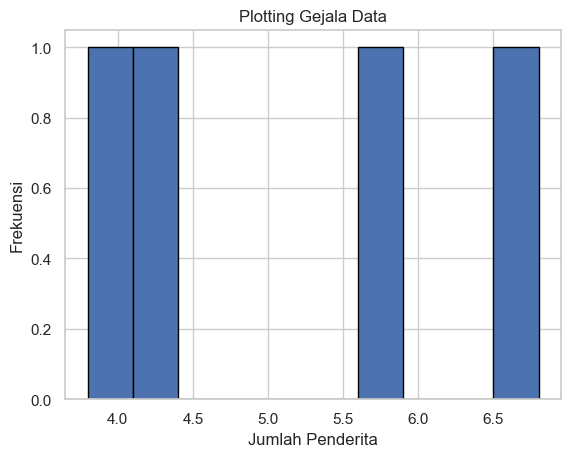

In [36]:
# Mengambil kolom "Jumlah Penderita" dari tabel
data = [float(row[2]) for row in tabel2[1:]]
print(data)
# Melakukan uji Shapiro-Wilk
statistic, p_value = shapiro(data)

# Menampilkan hasil uji normalitas
print("UJI NORMALITAS")
print("--------------")
print("Correlation:", statistic)

# Melakukan pengecekan hipotesis
alpha = 0.05
if statistic > alpha:
    print("Data NORMAL")
else:
    print("Data TIDAK NORMAL")

plt.hist(data, bins=10, edgecolor='black')
plt.xlabel("Jumlah Penderita")
plt.ylabel("Frekuensi")
plt.title("Plotting Gejala Data")
plt.show()

In [6]:
tabelrole =[
    ["Penyakit","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"],
    ["1. Busuk Pangkal Batang","0.88","0.76","0.70","0.52","0.51","0.41","0.66","0.00","0.17","0.13","0.11","0.13","0.00","0.00","0.00","0.00","0.07"],
    ["2. Busuk Pupus","0.00","0.21","0.13","0.00","0.00","0.00","0.00","0.76","0.71","0.64","0.48","0.82","0.00","0.17","0.00","0.00","0.17"],
    ["3. Busuk Tandan","0.00","0.19","0.11","0.00","0.00","0.00","0.00","0.00","0.38","0.26","0.28","0.00","0.92","0.73","0.80","0.71","0.11"],
    ["4. Korat Daun","0.00","0.55","0.00","0.13","0.26","0.00","0.00","0.00","0.31","0.13","0.10","0.00","0.00","0.00","0.00","0.00","0.92"]
]
print("A. Probabiltas Masing-masing Gejala Terhadap Penyakit")
print(tabulate(tabelrole, headers="firstrow", tablefmt="grid"))
print()

A. Probabiltas Masing-masing Gejala Terhadap Penyakit
+-------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| Penyakit                |    1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |   13 |   14 |   15 |   16 |   17 |
+=========================+======+======+======+======+======+======+======+======+======+======+======+======+======+======+======+======+======+
| 1. Busuk Pangkal Batang | 0.88 | 0.76 | 0.7  | 0.52 | 0.51 | 0.41 | 0.66 | 0    | 0.17 | 0.13 | 0.11 | 0.13 | 0    | 0    |  0   | 0    | 0.07 |
+-------------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| 2. Busuk Pupus          | 0    | 0.21 | 0.13 | 0    | 0    | 0    | 0    | 0.76 | 0.71 | 0.64 | 0.48 | 0.82 | 0    | 0.17 |  0   | 0    | 0.17 |
+-------------------------+------+------+------+------+------+--

## Perhitungan algoritma bayes ketika ada tanaman mengalami daun menguning (E2) dan anak daun dan pelepah mengering (E3) dapat dihitung dengan cara :

In [24]:
def probPenyakit(gejela1, gejala2):
    # Nilai probabilitas setiap penyakit tanaman kelapa sawit
    P1 = 0.68
    P2 = 0.56
    P3 = 0.42
    P4 = 0.38

    # Membaca nilai probabilitas gejala 1 terhadap setiap penyakit berdasarkan tabel diatas
    ProbGej1_P1 = tabelrole[1][gejela1]
    ProbGej1_P2 = tabelrole[2][gejela1]
    ProbGej1_P3 = tabelrole[3][gejela1]
    ProbGej1_P4 = tabelrole[4][gejela1]
    # Membaca nilai probabilitas gejala 2 terhadap setiap penyakit berdasarkan tabel diatas
    ProbGej2_P1 = tabelrole[1][gejala2]
    ProbGej2_P2 = tabelrole[2][gejala2]
    ProbGej2_P3 = tabelrole[3][gejala2]
    ProbGej2_P4 = tabelrole[4][gejala2]

    # Merubah nilai probabilitas gejala 1 dari string menjadi float
    ProbE1_P1 = float(ProbGej1_P1)
    ProbE1_P2 = float(ProbGej1_P2)
    ProbE1_P3 = float(ProbGej1_P3)
    ProbE1_P4 = float(ProbGej1_P4)
    # Merubah nilai probabilitas gejala 2 dari string menjadi float
    ProbE2_P1 = float(ProbGej2_P1)
    ProbE2_P2 = float(ProbGej2_P2)
    ProbE2_P3 = float(ProbGej2_P3)
    ProbE2_P4 = float(ProbGej2_P4)

    # Menghitung nilai N atau penyebut
    nilaiN = (ProbE1_P1*ProbE2_P1*P1)+(ProbE1_P2*ProbE2_P2*P2)+(ProbE1_P3*ProbE2_P3*P3)+(ProbE1_P4*ProbE2_P4*P4)

    # Menghitung probabilitas setiap penyakit berdasarkan gejala yang dialami
    probP1_E1E2 = (ProbE1_P1*ProbE2_P1*P1)/nilaiN
    probP2_E1E2 = (ProbE1_P2*ProbE2_P2*P2)/nilaiN
    probP3_E1E2 = (ProbE1_P3*ProbE2_P3*P3)/nilaiN
    probP4_E1E2 = (ProbE1_P4*ProbE2_P4*P4)/nilaiN

    print("Nilai N = {} ".format(nilaiN))
    print("\nProbabilitas Tanaman Mengalami Penyakit 1")
    print(probP1_E1E2)
    print("\nProbabilitas Tanaman Mengalami Penyakit 2")
    print(probP2_E1E2)
    print("\nProbabilitas Tanaman Mengalami Penyakit 3")
    print(probP3_E1E2)
    print("\nProbabilitas Tanaman Mengalami Penyakit 4")
    print(probP4_E1E2)
    
    hasilpenyakit = [probP1_E1E2,probP2_E1E2,probP3_E1E2,probP4_E1E2]

    if max(hasilpenyakit) == probP1_E1E2:
        print("Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Busuk Pangkal Batang")
    elif max(hasilpenyakit) == probP2_E1E2:
        print("Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Busuk Pupus")
    elif max(hasilpenyakit) == probP3_E1E2:
        print("Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Busuk Tandan")
    elif max(hasilpenyakit) == probP4_E1E2:
        print("Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Korat Daun")
        
    # Data probabilitas penyakit
    probabilities = [probP1_E1E2, probP2_E1E2, probP3_E1E2, probP4_E1E2]
    penyakit = ['Busuk Pangkal Batang', 'Busuk Pupus', 'Busuk Tandan', 'Korat Daun']

    # Mengatur gaya seaborn
    sns.set(style="whitegrid")

    # Membuat grafik bar menggunakan seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=penyakit, y=probabilities, palette="viridis")

    # Menambahkan nilai probabilitas pada setiap bar
    for i, v in enumerate(probabilities):
        ax.text(i, v, str(round(v, 2)), ha="center", va="bottom", fontsize=12)

    # Memberikan judul pada grafik
    plt.title('Korelasi Probabilitas Penyakit')

    # Memberikan label sumbu x dan y
    plt.ylabel('Probabilitas')

    # Menampilkan grafik
    plt.show()

gejala = Daun Menguning dan daun pelepah mengering
Nilai N = 0.385826 

Probabilitas Tanaman Mengalami Penyakit 1
0.9376247323923218

Probabilitas Tanaman Mengalami Penyakit 2
0.03962407924815851

Probabilitas Tanaman Mengalami Penyakit 3
0.02275118835951958

Probabilitas Tanaman Mengalami Penyakit 4
0.0
Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Busuk Pangkal Batang


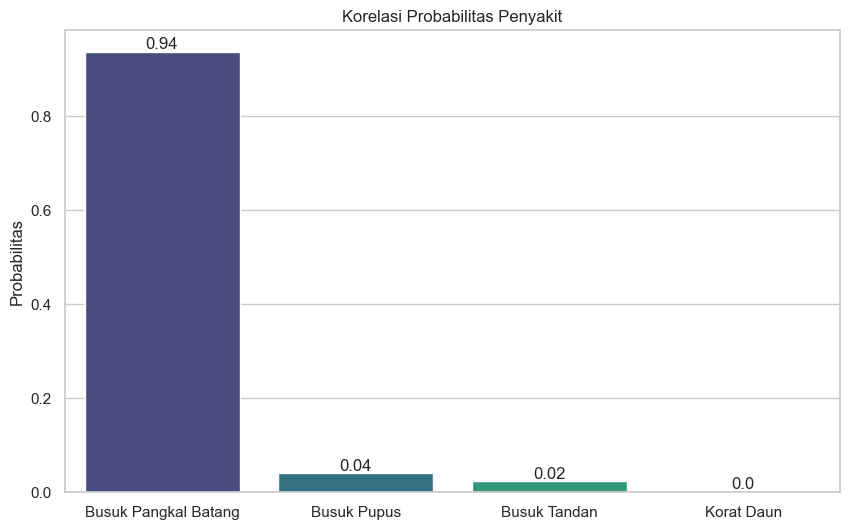


gejala = infeksi jamur malasmiun dan tandan bagian bawah busuk
Nilai N = 0.282072 

Probabilitas Tanaman Mengalami Penyakit 1
0.0

Probabilitas Tanaman Mengalami Penyakit 2
0.0

Probabilitas Tanaman Mengalami Penyakit 3
1.0

Probabilitas Tanaman Mengalami Penyakit 4
0.0
Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Busuk Tandan


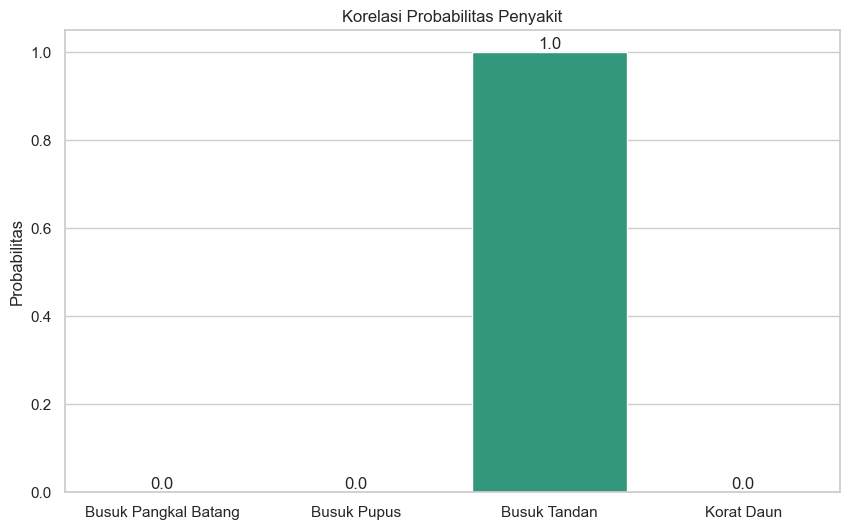


gejala = mengalami pembusukan dan aroma tidak sedap
Nilai N = 0.326302 

Probabilitas Tanaman Mengalami Penyakit 1
0.046055494603159046

Probabilitas Tanaman Mengalami Penyakit 2
0.7798419868710582

Probabilitas Tanaman Mengalami Penyakit 3
0.1271705352710066

Probabilitas Tanaman Mengalami Penyakit 4
0.04693198325477626
Jenis Penyakit yang dialami Kelapa Sawit adalah Penyakit Busuk Pupus


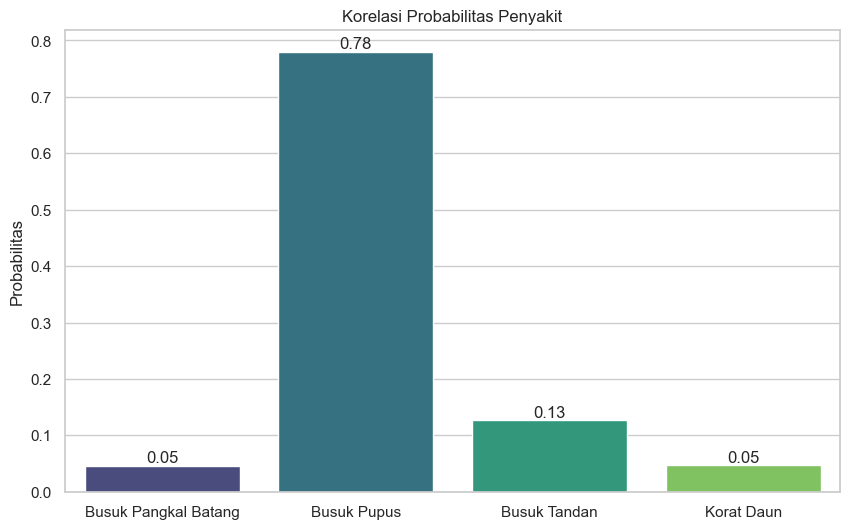

In [35]:
print("gejala = Daun Menguning dan daun pelepah mengering")
probPenyakit(2,3)
print("\ngejala = infeksi jamur malasmiun dan tandan bagian bawah busuk")
probPenyakit(13,14)
print("\ngejala = mengalami pembusukan dan aroma tidak sedap")
probPenyakit(9,10)